In [81]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [82]:
# Load the titanic dataset
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
# Print Information about the DataFrame
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
# Drop the 'Cabin' column, as it's not needed for analysis. You can also drop other columns as necessary.
titanic_df.drop(["Cabin","Name", "Ticket"], axis=1, inplace=True)
#Replacing missing data with highest count
titanic_df["Embarked"] = titanic_df["Embarked"].fillna('S')
# Double-check to make sure there are no more missing values
#Not too many are missing and took the median
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())  # Replace with median age
print(titanic_df.value_counts(dropna=False))

PassengerId  Survived  Pclass  Sex     Age   SibSp  Parch  Fare    Embarked
1            0         3       male    22.0  1      0      7.250   S           1
599          0         3       male    28.0  0      0      7.225   C           1
588          1         1       male    60.0  1      1      79.200  C           1
589          0         3       male    22.0  0      0      8.050   S           1
590          0         3       male    28.0  0      0      8.050   S           1
                                                                              ..
301          1         3       female  28.0  0      0      7.750   Q           1
302          1         3       male    28.0  2      0      23.250  Q           1
303          0         3       male    19.0  0      0      0.000   S           1
304          1         2       female  28.0  0      0      12.350  Q           1
891          0         3       male    32.0  0      0      7.750   Q           1
Name: count, Length: 891, dtype: 

### One-Hot Encoding
One-hot encoding is a technique used to transform categorical variables into a numerical format, making them suitable for machine learning algorithms. It works by creating new binary columns for each unique category in the original variable, where each column represents one possible category. This way, the categorical data is converted into a format that algorithms can easily process without assuming any inherent order or priority between the categories. For instance, in the 'Sex' column, which contains categories such as 'male' and 'female', one-hot encoding would generate two new columns, one for each category, with a binary value of 1 or 0 to indicate the presence of that category for each record.

In [85]:
# Return unique values from the Sex column
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine learning classifiers are unable to handle string values directly, so categorical data must be converted into a numerical form. There are two primary methods for doing this:

1. **Label Encoding**: This technique assigns a unique integer to each category, such as 0 for 'male' and 1 for 'female'. However, this approach introduces a problem—by using numbers, it suggests a ranking or order between the categories, which can confuse some machine learning models into thinking one category is inherently 'greater' than the other.

2. **One-Hot Encoding**: This method avoids the issue of implied order by creating separate binary columns for each category. For example, instead of assigning numbers to 'male' and 'female', one-hot encoding creates two new columns—`Sex_male` and `Sex_female`. If a person is `male`, there will be a 1 in the `Sex_male` column and a 0 in the `Sex_female` column, and vice versa for females. This method ensures each category is treated independently, without any implied hierarchy.

In pandas, a straightforward way to perform one-hot encoding is by using the `get_dummies()` function, which automatically generates these binary columns for categorical variables in your dataset.

In [86]:
# Apply one-hot encoding to the 'Sex' column
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"], drop_first=True)

titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,1,0,3,22.0,1,0,7.2500,S,True
1,2,1,1,38.0,1,0,71.2833,C,False
2,3,1,3,26.0,0,0,7.9250,S,False
3,4,1,1,35.0,1,0,53.1000,S,False
4,5,0,3,35.0,0,0,8.0500,S,True


Now, we do the same to the "Embarked" column.

In [87]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], prefix='Embarked', drop_first=True)
print(titanic_df.head())


   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500      True   
1            2         1       1  38.0      1      0  71.2833     False   
2            3         1       3  26.0      0      0   7.9250     False   
3            4         1       1  35.0      1      0  53.1000     False   
4            5         0       3  35.0      0      0   8.0500      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


## Split data into independent and dependent variables

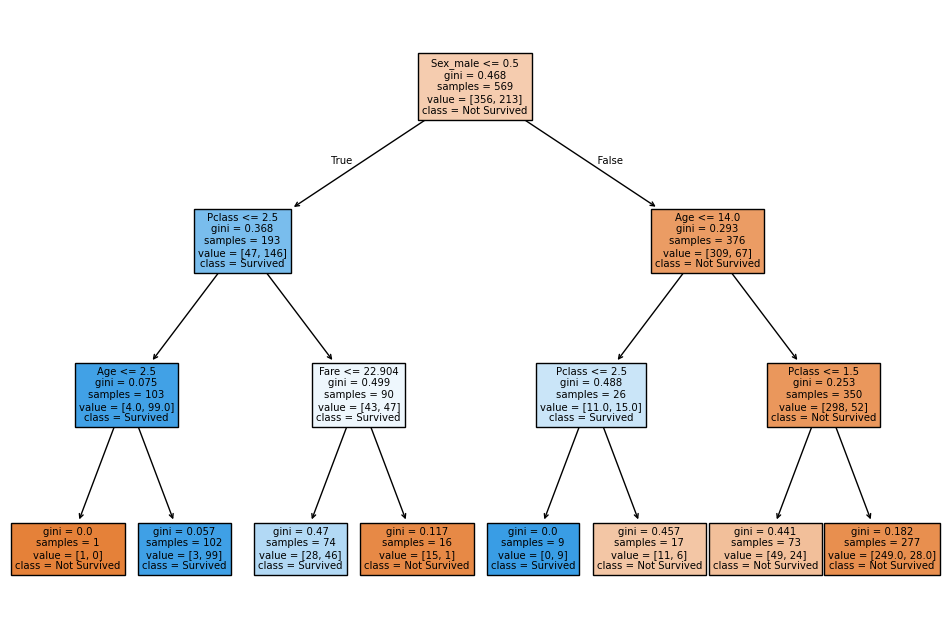

0.7622377622377622
0.8100558659217877
      Feature  Importance
3    Sex_male    0.638001
0      Pclass    0.220093
1         Age    0.080384
2        Fare    0.061521
4  Embarked_Q    0.000000
5  Embarked_S    0.000000


In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = titanic_df[["Pclass", "Age","Fare", "Sex_male", "Embarked_Q", "Embarked_S"]]
y = titanic_df["Survived"]

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)

X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size = 0.2, shuffle = True, random_state = 0)

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

y_dev_test = model.predict(X_dev)
y_pred_test = model.predict(X_test)
acc_dev = accuracy_score(y_dev, y_dev_test)
acc_test = accuracy_score(y_test, y_pred_test)

print(acc_dev)
print(acc_test)

# Create a DataFrame of features and their importance scores
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)
